# Import & Settings

In [1]:
%load_ext autoreload
%autoreload 2

from packages import *

In [2]:
sce =DotDic( {
    "nDBS": 1,
    "nIAB": 2,
    "nUE": 7,   #number of total UEs
    "K":3 ,     #number of UEs connected to each IAB
    "dist_IAB_centre":20,
    "rDBS": 100,
    "rIAB": 70,
    "interference_dist_IAB": 50,
    "BW": 250*10**6,     #total bandwidth=100MHz (assume),then each channel bandwidth=250Mhz
    "nChannel": 3,
    "N0": -174,            #-174,
    "profit": 0.5,
    "power_cost": 0.0005,
    "action_cost": 0.0001,
    "negative_cost": -1.0,
    "QoS_thr": 5,
    "beta":2*10**(-3),                  #4*10**(-3)
    "AL":10**(-10),
    "ANL":10**(-14),
    "alphaL":2,
    "alphaNL":4,
    "M_db":10,       # main lobe gain in dB
    "m_db": 1,   # -10 , # side lobe gain in dB
    "Phi_rad" : 30 # 30degree
   })
opt = DotDic({
    "min_episode_for_epsilon_decay":30,
    "nagents":3,
    "capacity": 100000,
    "learningrate": 0.0001,
    "momentum": 0.005,
    "eps_max": 0.9,
    "eps_min": 0.0,
    "eps_decay": 200,
    "eps_increment": 0.003,
    "batch_size": 32,
    "sigma_decay": 0.99,
    "gamma": 0.95,
    "nepisodes":300,
    "nsteps": 50,
    "nupdate": 100,
    "cuda":0
    })

# import torch
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = '/GPU:0' if tf.config.experimental.list_physical_devices('GPU') else '/CPU:0'

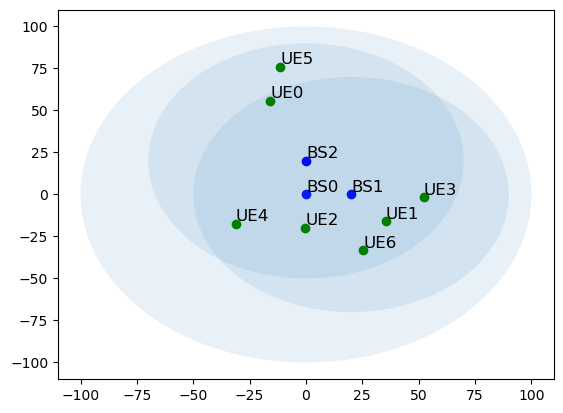

In [3]:
scenario = Scenario(sce)
plot_locations(scenario,sce,opt)

In [4]:
save_path = 'saved_models/'
# Dimension of State & Action Space for single agent

dim_agent_action= sce.K  #sce.nChannel*sce.nIAB

dim_agent_state = 2*sce.K + dim_agent_action

# Number of Agents
num_agents = sce.nIAB

# Critic all states
critic_dim_agent_state=num_agents*dim_agent_state

# Number of Episodes
num_episodes = 10001

# Number of Steps in each episodes
num_steps = 25

# For adding noise for exploration
std_dev = 0.2
ou_noise = OUActionNoise(mean=np.zeros(dim_agent_action), std_deviation=float(std_dev) * np.ones(dim_agent_action))

print('Dimention of Action Space:', dim_agent_action)
print('Dimention of State Space:', dim_agent_state)

Dimention of Action Space: 3
Dimention of State Space: 9


In [5]:
# Neural Net Models for agents will be saved in these lists
actor_models = []
critic_models = []
target_actor_models = []
target_critic_models = []

# Appending Neural Network models in lists
for i in range(num_agents):
    actor_models.append(get_actor(dim_agent_state,dim_agent_action)) 
    critic_models.append(get_critic(critic_dim_agent_state,dim_agent_action))

    target_actor_models.append(get_actor(dim_agent_state,dim_agent_action))
    target_critic_models.append(get_critic(critic_dim_agent_state,dim_agent_action))

    # Making the weights equal initially
    target_actor_models[i].set_weights(actor_models[i].get_weights())
    target_critic_models[i].set_weights(critic_models[i].get_weights())

# Creating class for replay buffer   
buffer = Buffer(dim_agent_state,dim_agent_action,num_agents,20000, 128)

ep_reward_list = []

# To store average reward history of last few episodes
avg_reward_list = []

# Rewards of agent will be stired in these lists
ag1_reward_list = []
ag2_reward_list = []

In [6]:
action_IAB=np.zeros((sce.nIAB, dim_agent_action))
prev_state=np.zeros((sce.nIAB, dim_agent_state))

# Training

State size of agent 0 : 9
Action size of agent 0 : 3
State size of agent 1 : 9
Action size of agent 1 : 3
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


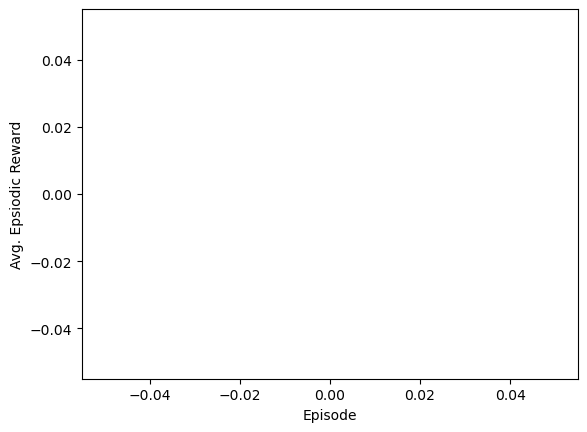

State 1:  [1.42008644 0.36101123 1.17003285 0.18311248 0.8511838  0.19054672
 0.44950122 0.31529525 0.23520352] 
State 2:  [0.39485271 1.47143748 1.3118336  0.78626803 0.13763676 0.20055887
 0.31130585 0.29446122 0.39423299] 

Agent 0 Action [[0.45  0.315 0.235]]
Agent 1 Action [[0.311 0.294 0.394]]
Time Taken till now: 0.0 Hrs

 Episode * 1 * Episode Reward is ==> 521.86 : Ag1 Reward ==> 251.31 : Ag2 Reward ==> 270.55:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


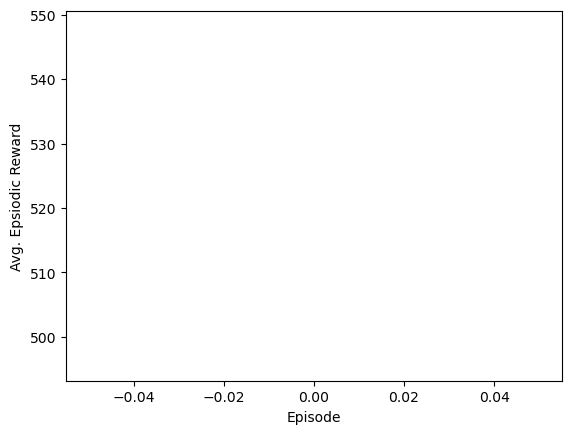

State 1:  [0.66893073 0.42471888 0.77738212 0.5580964  0.76358895 0.3476705
 0.430251   0.33210787 0.23764116] 
State 2:  [0.53931467 0.75810698 0.43425506 0.59030926 0.40337832 0.81377201
 0.30725947 0.30078617 0.39195436] 

Agent 0 Action [[0.43  0.332 0.238]]
Agent 1 Action [[0.307 0.301 0.392]]
Time Taken till now: 0.0 Hrs

 Episode * 2 * Episode Reward is ==> 306.75 : Ag1 Reward ==> 159.44 : Ag2 Reward ==> 147.31:

 Episode * 3 * Episode Reward is ==> -188.27 : Ag1 Reward ==> -99.34 : Ag2 Reward ==> -88.93:

 Episode * 4 * Episode Reward is ==> -250.00 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -125.00:

 Episode * 5 * Episode Reward is ==> 69.61 : Ag1 Reward ==> 1.86 : Ag2 Reward ==> 67.75:

 Episode * 6 * Episode Reward is ==> -214.32 : Ag1 Reward ==> -103.06 : Ag2 Reward ==> -111.25:

 Episode * 7 * Episode Reward is ==> -225.16 : Ag1 Reward ==> -112.39 : Ag2 Reward ==> -112.77:

 Episode * 8 * Episode Reward is ==> -85.48 : Ag1 Reward ==> -61.86 : Ag2 Reward ==> -23.62:

 Episo

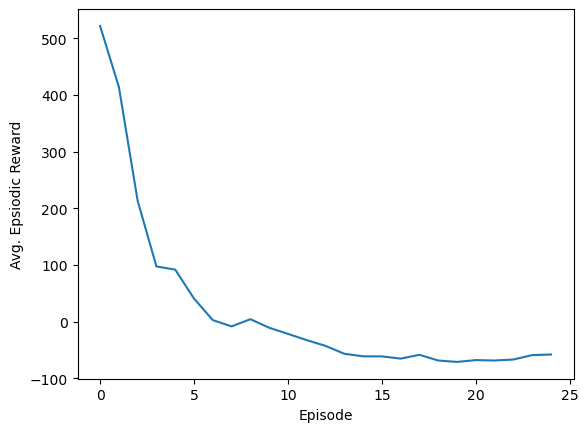

State 1:  [0.52881339 0.45093266 0.32862423 0.61174392 0.63363264 1.06808772
 0.31762636 0.25387487 0.42849877] 
State 2:  [0.26994122 0.34465931 0.30459418 0.9853225  0.92119191 1.07141321
 0.27247491 0.34318957 0.38433558] 

Agent 0 Action [[0.318 0.254 0.428]]
Agent 1 Action [[0.272 0.343 0.384]]
Time Taken till now: 0.016 Hrs

 Episode * 26 * Episode Reward is ==> 189.63 : Ag1 Reward ==> 111.39 : Ag2 Reward ==> 78.24:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


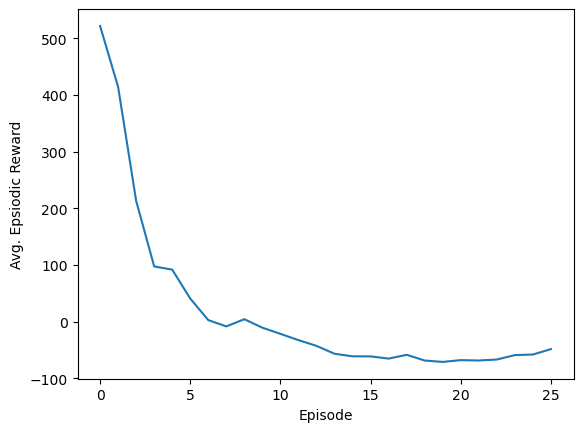

State 1:  [1.44279767 0.43297991 0.43701136 0.15081835 0.62165139 0.86413236
 0.3255724  0.22756511 0.44686249] 
State 2:  [0.5671324  0.46003534 0.34205906 0.53479811 0.73011843 0.96492805
 0.27859604 0.34928653 0.37211743] 

Agent 0 Action [[0.326 0.228 0.447]]
Agent 1 Action [[0.279 0.349 0.372]]
Time Taken till now: 0.016 Hrs

 Episode * 27 * Episode Reward is ==> 313.49 : Ag1 Reward ==> 196.92 : Ag2 Reward ==> 116.57:

 Episode * 28 * Episode Reward is ==> -65.59 : Ag1 Reward ==> -17.55 : Ag2 Reward ==> -48.05:

 Episode * 29 * Episode Reward is ==> -120.71 : Ag1 Reward ==> -78.26 : Ag2 Reward ==> -42.45:

 Episode * 30 * Episode Reward is ==> 239.66 : Ag1 Reward ==> 198.67 : Ag2 Reward ==> 40.99:

 Episode * 31 * Episode Reward is ==> -179.17 : Ag1 Reward ==> -70.74 : Ag2 Reward ==> -108.43:

 Episode * 32 * Episode Reward is ==> -38.36 : Ag1 Reward ==> -49.23 : Ag2 Reward ==> 10.86:

 Episode * 33 * Episode Reward is ==> 78.13 : Ag1 Reward ==> 23.51 : Ag2 Reward ==> 54.62:

 Epi

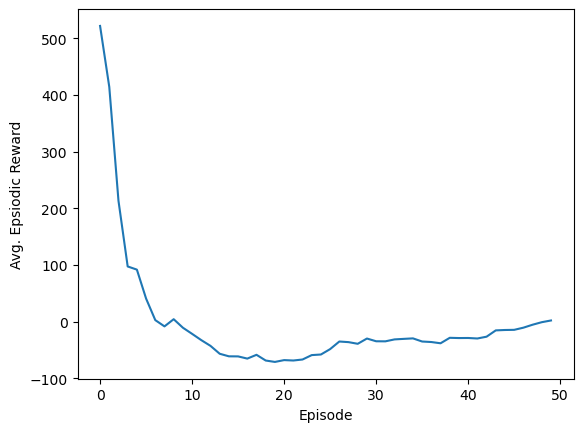

State 1:  [0.64310334 0.30245582 0.46657235 0.58327352 0.73577142 0.76150798
 0.43092597 0.1793582  0.38971576] 
State 2:  [0.61049629 1.19749107 1.29863728 0.49204027 0.22338544 0.19945065
 0.27438495 0.35038856 0.37522653] 

Agent 0 Action [[0.431 0.179 0.39 ]]
Agent 1 Action [[0.274 0.35  0.375]]
Time Taken till now: 0.031 Hrs

 Episode * 51 * Episode Reward is ==> 384.64 : Ag1 Reward ==> 120.14 : Ag2 Reward ==> 264.50:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


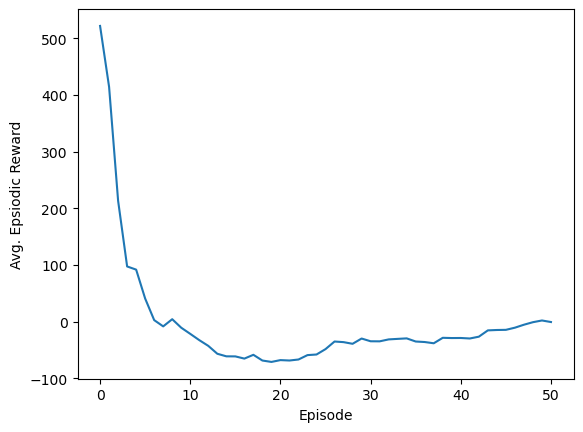

State 1:  [0.52533724 0.59421194 0.29439732 0.76786967 0.38251503 1.04729002
 0.49412459 0.1567397  0.34913567] 
State 2:  [0.29413246 0.92306968 0.3569894  0.81376371 0.35141826 0.97603505
 0.21051389 0.3822464  0.40723971] 

Agent 0 Action [[0.494 0.157 0.349]]
Agent 1 Action [[0.211 0.382 0.407]]
Time Taken till now: 0.031 Hrs

 Episode * 52 * Episode Reward is ==> 254.18 : Ag1 Reward ==> 120.24 : Ag2 Reward ==> 133.94:

 Episode * 53 * Episode Reward is ==> 137.95 : Ag1 Reward ==> 110.02 : Ag2 Reward ==> 27.94:

 Episode * 54 * Episode Reward is ==> 14.37 : Ag1 Reward ==> 35.90 : Ag2 Reward ==> -21.54:

 Episode * 55 * Episode Reward is ==> 68.34 : Ag1 Reward ==> 43.46 : Ag2 Reward ==> 24.88:

 Episode * 56 * Episode Reward is ==> -42.45 : Ag1 Reward ==> -31.71 : Ag2 Reward ==> -10.74:

 Episode * 57 * Episode Reward is ==> 161.78 : Ag1 Reward ==> 69.57 : Ag2 Reward ==> 92.21:

 Episode * 58 * Episode Reward is ==> 377.94 : Ag1 Reward ==> 226.52 : Ag2 Reward ==> 151.41:

 Episode *

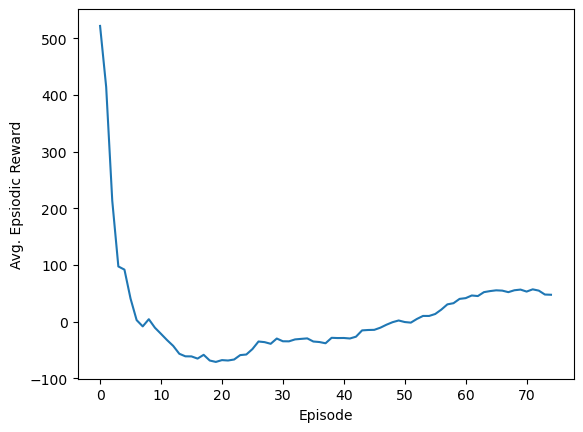

State 1:  [0.4445877  0.24052917 0.55465049 0.91051263 0.84939175 0.5828454
 0.51127642 0.17219944 0.31652415] 
State 2:  [1.0597068  0.92663304 0.25678588 0.24716105 0.37196494 1.03774053
 0.28550783 0.43293887 0.28155321] 

Agent 0 Action [[0.511 0.172 0.317]]
Agent 1 Action [[0.286 0.433 0.282]]
Time Taken till now: 0.046 Hrs

 Episode * 76 * Episode Reward is ==> 296.51 : Ag1 Reward ==> 105.52 : Ag2 Reward ==> 190.99:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


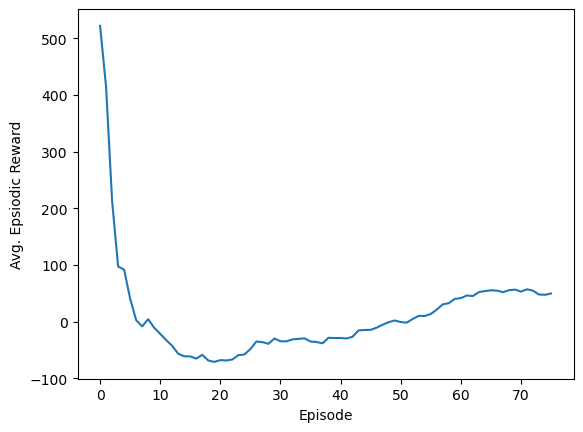

State 1:  [1.54205218 1.0348823  0.38820286 0.16100708 0.19129937 0.84262937
 0.49355856 0.15881601 0.34762537] 
State 2:  [1.47994995 1.57426677 0.48101263 0.13402162 0.13957381 0.6575056
 0.28611928 0.4068037  0.30707705] 

Agent 0 Action [[0.494 0.159 0.348]]
Agent 1 Action [[0.286 0.407 0.307]]
Time Taken till now: 0.046 Hrs

 Episode * 77 * Episode Reward is ==> 553.55 : Ag1 Reward ==> 252.56 : Ag2 Reward ==> 300.99:

 Episode * 78 * Episode Reward is ==> -179.19 : Ag1 Reward ==> -77.80 : Ag2 Reward ==> -101.38:

 Episode * 79 * Episode Reward is ==> -219.34 : Ag1 Reward ==> -114.98 : Ag2 Reward ==> -104.36:

 Episode * 80 * Episode Reward is ==> 183.93 : Ag1 Reward ==> 75.33 : Ag2 Reward ==> 108.60:

 Episode * 81 * Episode Reward is ==> 36.62 : Ag1 Reward ==> 10.63 : Ag2 Reward ==> 25.99:

 Episode * 82 * Episode Reward is ==> 201.84 : Ag1 Reward ==> 59.62 : Ag2 Reward ==> 142.22:

 Episode * 83 * Episode Reward is ==> 90.23 : Ag1 Reward ==> 5.20 : Ag2 Reward ==> 85.04:

 Episod

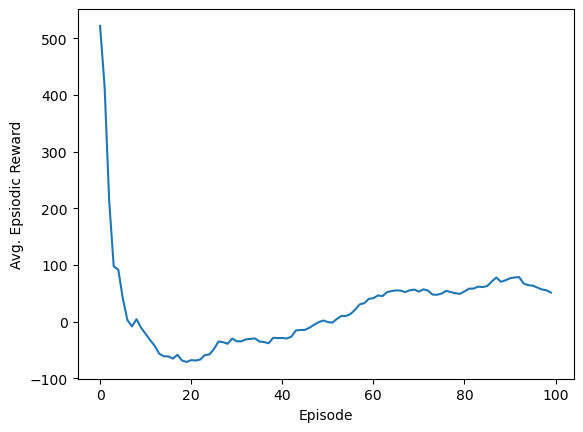

State 1:  [1.32987745e+00 4.87864526e-03 3.72227711e-02 3.06530813e-01
 3.26338228e-01 1.03724844e+00 9.70396280e-01 3.62218270e-04
 2.92415861e-02] 
State 2:  [0.15746875 1.41023589 0.43460578 0.98792994 0.19400566 0.79591343
 0.13410045 0.49043304 0.3754665 ] 

Agent 0 Action [[0.97  0.    0.029]]
Agent 1 Action [[0.134 0.49  0.375]]
Time Taken till now: 0.062 Hrs

 Episode * 101 * Episode Reward is ==> 45.48 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> 170.48:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


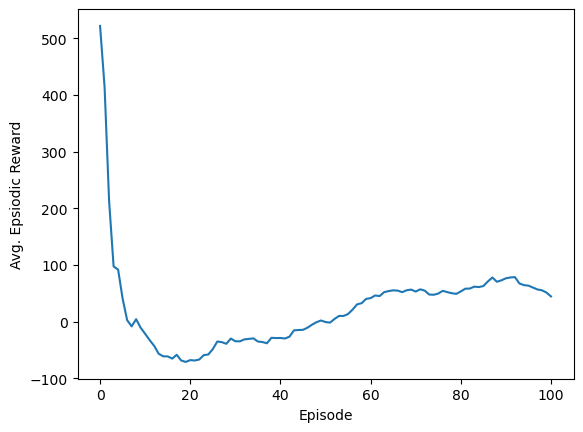

State 1:  [0.74023421 0.05593374 0.07974614 0.73888368 0.16761972 0.86186375
 0.95280689 0.00117905 0.04601417] 
State 2:  [0.1480991  0.50632325 0.61656476 1.03377268 0.80522596 0.5556448
 0.1361471  0.50657004 0.35728294] 

Agent 0 Action [[0.953 0.001 0.046]]
Agent 1 Action [[0.136 0.507 0.357]]
Time Taken till now: 0.062 Hrs

 Episode * 102 * Episode Reward is ==> -26.12 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> 98.88:

 Episode * 103 * Episode Reward is ==> -89.55 : Ag1 Reward ==> -47.27 : Ag2 Reward ==> -42.28:

 Episode * 104 * Episode Reward is ==> -250.00 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -125.00:

 Episode * 105 * Episode Reward is ==> -175.25 : Ag1 Reward ==> -50.25 : Ag2 Reward ==> -125.00:

 Episode * 106 * Episode Reward is ==> 24.40 : Ag1 Reward ==> 56.51 : Ag2 Reward ==> -32.10:

 Episode * 107 * Episode Reward is ==> -12.92 : Ag1 Reward ==> -37.99 : Ag2 Reward ==> 25.08:

 Episode * 108 * Episode Reward is ==> 54.55 : Ag1 Reward ==> -58.48 : Ag2 Reward ==> 113.

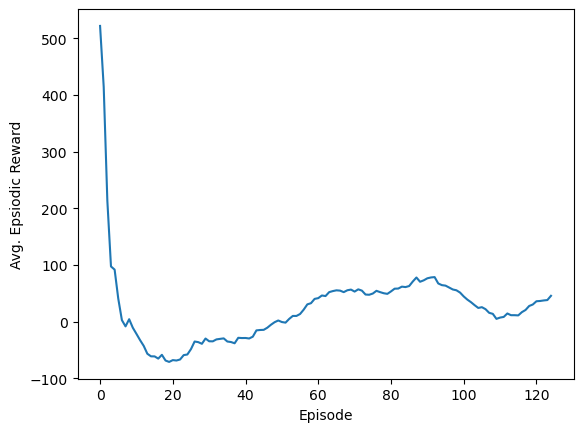

State 1:  [6.00295437e-01 1.49199295e-03 2.92270046e-01 7.86386140e-01
 9.25292541e-01 1.01197087e+00 6.76591873e-01 8.86283349e-04
 3.22521836e-01] 
State 2:  [0.55629238 0.37579776 0.77168093 0.55984549 0.96520893 0.3765472
 0.29375458 0.43250999 0.27373546] 

Agent 0 Action [[0.677 0.001 0.323]]
Agent 1 Action [[0.294 0.433 0.274]]
Time Taken till now: 0.077 Hrs

 Episode * 126 * Episode Reward is ==> 20.05 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> 145.05:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


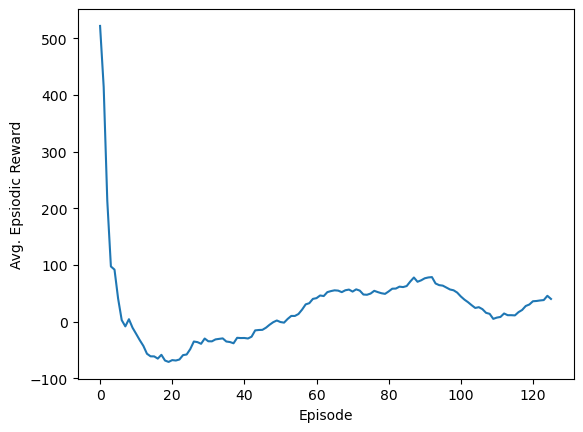

State 1:  [0.63872265 0.01640371 1.090575   0.73146397 0.47015434 0.25368144
 0.66773963 0.0025697  0.32969067] 
State 2:  [0.93791751 0.35866454 0.73796367 0.29592686 1.00518075 0.40289585
 0.28362221 0.43515339 0.28122434] 

Agent 0 Action [[0.668 0.003 0.33 ]]
Agent 1 Action [[0.284 0.435 0.281]]
Time Taken till now: 0.077 Hrs

 Episode * 127 * Episode Reward is ==> 48.21 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> 173.21:

 Episode * 128 * Episode Reward is ==> 214.85 : Ag1 Reward ==> 1.53 : Ag2 Reward ==> 213.32:

 Episode * 129 * Episode Reward is ==> -103.37 : Ag1 Reward ==> -22.40 : Ag2 Reward ==> -80.97:

 Episode * 130 * Episode Reward is ==> 42.16 : Ag1 Reward ==> -44.20 : Ag2 Reward ==> 86.36:

 Episode * 131 * Episode Reward is ==> -199.95 : Ag1 Reward ==> -82.90 : Ag2 Reward ==> -117.04:

 Episode * 132 * Episode Reward is ==> -212.25 : Ag1 Reward ==> -101.71 : Ag2 Reward ==> -110.54:

 Episode * 133 * Episode Reward is ==> -192.00 : Ag1 Reward ==> -106.10 : Ag2 Reward ==> 

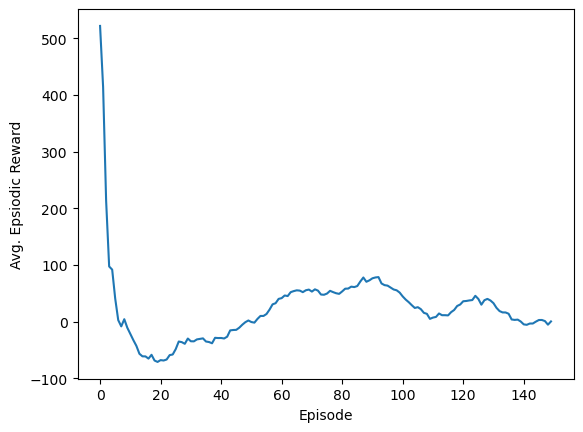

State 1:  [0.71093026 0.06824449 1.17770932 0.64242346 0.49833207 0.2239133
 0.65486115 0.0129446  0.33219424] 
State 2:  [0.32357821 0.65825266 0.40149066 0.89014951 0.57219244 0.72607697
 0.29064733 0.43640053 0.27295214] 

Agent 0 Action [[0.655 0.013 0.332]]
Agent 1 Action [[0.291 0.436 0.273]]
Time Taken till now: 0.093 Hrs

 Episode * 151 * Episode Reward is ==> -7.23 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> 117.77:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


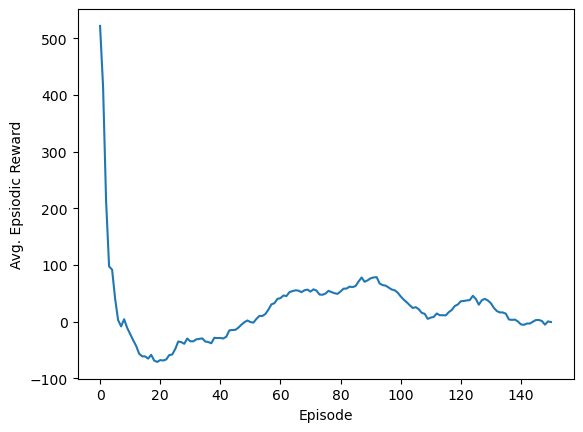

State 1:  [0.44479354 0.0382923  0.55908336 1.03836089 0.63312502 0.58440536
 0.66547847 0.01122501 0.32329658] 
State 2:  [0.29863634 0.35292801 0.38154972 0.91886773 1.05746366 0.73354037
 0.27450061 0.46943036 0.25606909] 

Agent 0 Action [[0.665 0.011 0.323]]
Agent 1 Action [[0.275 0.469 0.256]]
Time Taken till now: 0.093 Hrs

 Episode * 152 * Episode Reward is ==> -37.01 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> 87.99:

 Episode * 153 * Episode Reward is ==> -215.70 : Ag1 Reward ==> -117.19 : Ag2 Reward ==> -98.51:

 Episode * 154 * Episode Reward is ==> 33.07 : Ag1 Reward ==> 15.53 : Ag2 Reward ==> 17.54:

 Episode * 155 * Episode Reward is ==> 6.15 : Ag1 Reward ==> -5.17 : Ag2 Reward ==> 11.32:

 Episode * 156 * Episode Reward is ==> -149.02 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -24.02:

 Episode * 157 * Episode Reward is ==> 5.23 : Ag1 Reward ==> -8.19 : Ag2 Reward ==> 13.43:

 Episode * 158 * Episode Reward is ==> -171.60 : Ag1 Reward ==> -110.90 : Ag2 Reward ==> -60.70:



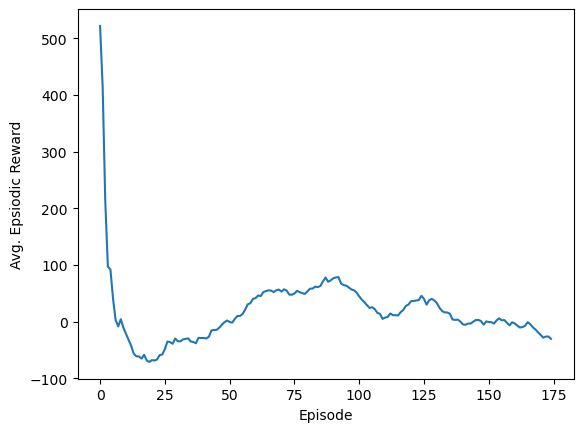

State 1:  [0.88552056 0.13114642 0.90989106 0.46527051 1.05288124 0.30744326
 0.59709877 0.12190116 0.28100002] 
State 2:  [0.40970319 0.40313972 0.81299471 0.80034096 0.92373526 0.31040294
 0.34313366 0.44483545 0.21203095] 

Agent 0 Action [[0.597 0.122 0.281]]
Agent 1 Action [[0.343 0.445 0.212]]
Time Taken till now: 0.109 Hrs

 Episode * 176 * Episode Reward is ==> 302.45 : Ag1 Reward ==> 164.02 : Ag2 Reward ==> 138.43:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


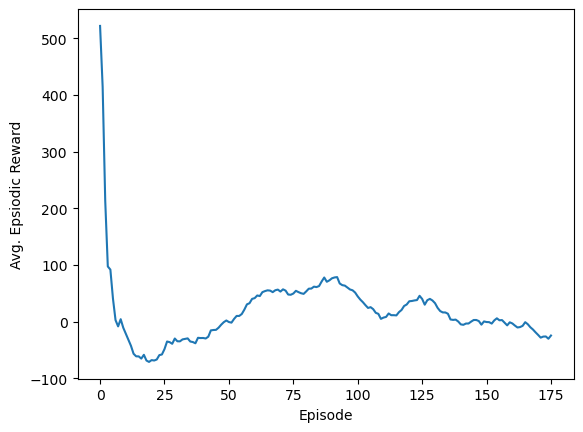

State 1:  [0.15055641 2.07759092 0.39005776 0.86440378 0.08176579 0.80104254
 0.09713063 0.58622921 0.31664023] 
State 2:  [0.40647411 0.61389763 0.3303898  0.80059476 0.62258182 0.75650618
 0.33879861 0.44446069 0.21674065] 

Agent 0 Action [[0.097 0.586 0.317]]
Agent 1 Action [[0.339 0.444 0.217]]
Time Taken till now: 0.109 Hrs

 Episode * 177 * Episode Reward is ==> 323.96 : Ag1 Reward ==> 208.97 : Ag2 Reward ==> 114.99:

 Episode * 178 * Episode Reward is ==> 29.89 : Ag1 Reward ==> -37.36 : Ag2 Reward ==> 67.25:

 Episode * 179 * Episode Reward is ==> -22.50 : Ag1 Reward ==> 2.14 : Ag2 Reward ==> -24.64:

 Episode * 180 * Episode Reward is ==> -227.27 : Ag1 Reward ==> -102.27 : Ag2 Reward ==> -125.00:

 Episode * 181 * Episode Reward is ==> -67.79 : Ag1 Reward ==> -27.31 : Ag2 Reward ==> -40.49:

 Episode * 182 * Episode Reward is ==> -250.00 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -125.00:

 Episode * 183 * Episode Reward is ==> -95.44 : Ag1 Reward ==> -37.55 : Ag2 Reward ==> -5

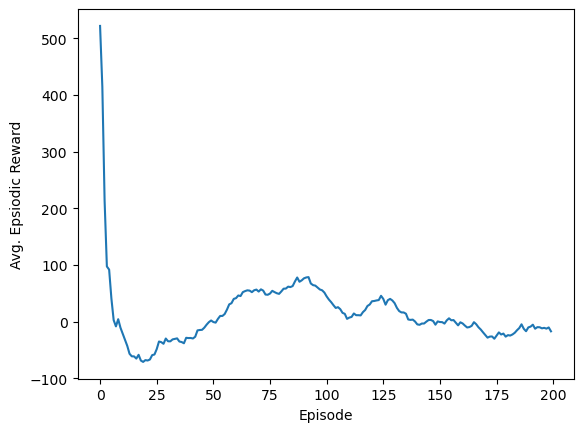

State 1:  [0.7772671  0.94037494 0.46924278 0.54228932 0.21111001 0.63827805
 0.57794738 0.14542678 0.27662584] 
State 2:  [0.88171236 0.48369654 0.2982175  0.36523759 0.76822595 0.80996111
 0.36365032 0.42350504 0.21284463] 

Agent 0 Action [[0.578 0.145 0.277]]
Agent 1 Action [[0.364 0.424 0.213]]
Time Taken till now: 0.125 Hrs

 Episode * 201 * Episode Reward is ==> 333.08 : Ag1 Reward ==> 191.41 : Ag2 Reward ==> 141.67:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


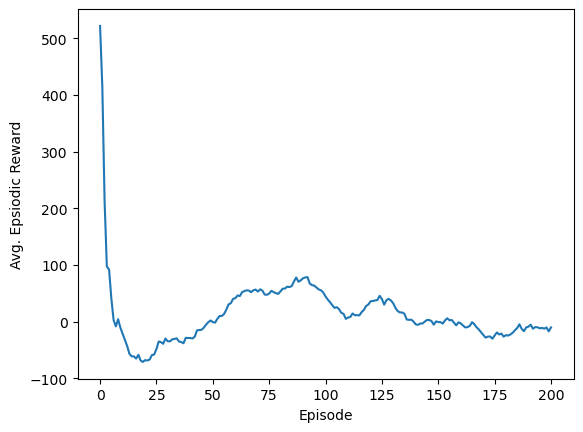

State 1:  [0.84758066 0.65626133 0.88495444 0.49649438 0.32002235 0.30722577
 0.60450709 0.13560078 0.2598922 ] 
State 2:  [0.46714819 0.6332922  0.26426324 0.71265903 0.60217792 0.88577331
 0.34208056 0.44429359 0.2136258 ] 

Agent 0 Action [[0.605 0.136 0.26 ]]
Agent 1 Action [[0.342 0.444 0.214]]
Time Taken till now: 0.125 Hrs

 Episode * 202 * Episode Reward is ==> 320.44 : Ag1 Reward ==> 204.24 : Ag2 Reward ==> 116.19:

 Episode * 203 * Episode Reward is ==> -76.43 : Ag1 Reward ==> -60.69 : Ag2 Reward ==> -15.74:

 Episode * 204 * Episode Reward is ==> -239.52 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -114.52:

 Episode * 205 * Episode Reward is ==> -231.13 : Ag1 Reward ==> -116.26 : Ag2 Reward ==> -114.88:

 Episode * 206 * Episode Reward is ==> -167.04 : Ag1 Reward ==> -72.45 : Ag2 Reward ==> -94.59:

 Episode * 207 * Episode Reward is ==> -33.57 : Ag1 Reward ==> -3.18 : Ag2 Reward ==> -30.39:

 Episode * 208 * Episode Reward is ==> -28.76 : Ag1 Reward ==> 0.59 : Ag2 Reward ==> 

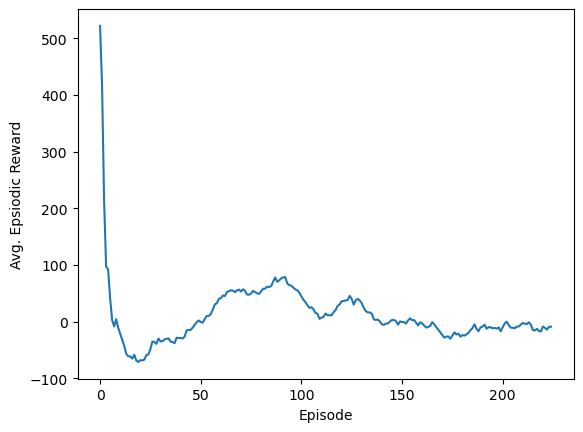

State 1:  [0.45927911 0.20197664 0.30361264 0.95911922 1.05355575 0.75426377
 0.60098326 0.20945439 0.18956229] 
State 2:  [1.28919496 0.40333987 0.51504702 0.19600716 0.90477693 0.52251372
 0.35257041 0.42711911 0.22031049] 

Agent 0 Action [[0.601 0.209 0.19 ]]
Agent 1 Action [[0.353 0.427 0.22 ]]
Time Taken till now: 0.14 Hrs

 Episode * 226 * Episode Reward is ==> 270.16 : Ag1 Reward ==> 82.18 : Ag2 Reward ==> 187.98:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


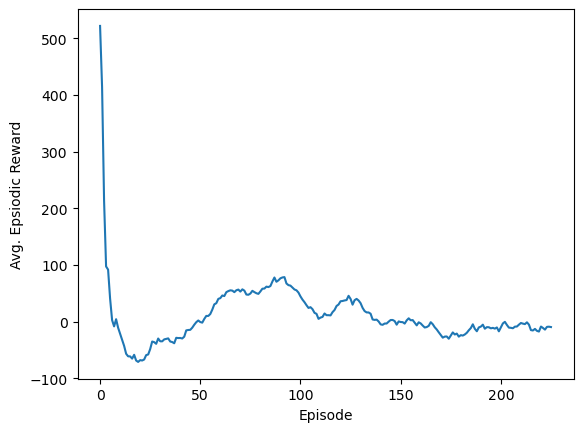

State 1:  [0.25856471 1.43104876 0.75926882 0.85644631 0.19949139 0.37123743
 0.19364549 0.5506407  0.25571385] 
State 2:  [0.28299481 0.47060193 0.24130546 1.0604462  0.80198349 0.96474889
 0.33784929 0.43901181 0.22313879] 

Agent 0 Action [[0.194 0.551 0.256]]
Agent 1 Action [[0.338 0.439 0.223]]
Time Taken till now: 0.14 Hrs

 Episode * 227 * Episode Reward is ==> 293.19 : Ag1 Reward ==> 208.49 : Ag2 Reward ==> 84.70:

 Episode * 228 * Episode Reward is ==> 172.40 : Ag1 Reward ==> 36.22 : Ag2 Reward ==> 136.18:

 Episode * 229 * Episode Reward is ==> 79.22 : Ag1 Reward ==> -0.79 : Ag2 Reward ==> 80.01:

 Episode * 230 * Episode Reward is ==> 250.77 : Ag1 Reward ==> 135.08 : Ag2 Reward ==> 115.68:

 Episode * 231 * Episode Reward is ==> -108.85 : Ag1 Reward ==> -61.49 : Ag2 Reward ==> -47.36:

 Episode * 232 * Episode Reward is ==> 213.45 : Ag1 Reward ==> 132.10 : Ag2 Reward ==> 81.35:

 Episode * 233 * Episode Reward is ==> -148.56 : Ag1 Reward ==> -81.02 : Ag2 Reward ==> -67.54:



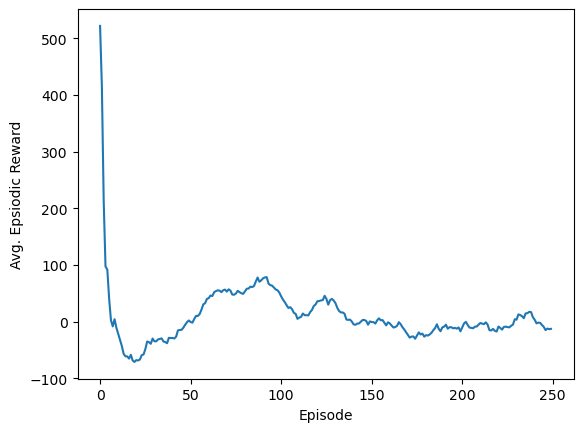

State 1:  [0.43334217 0.25266607 1.19673265 0.98223879 1.00824338 0.1563347
 0.5689531  0.25980839 0.17123851] 
State 2:  [0.32767905 1.06796798 1.28549586 0.90452108 0.29086909 0.17834848
 0.30595112 0.40526551 0.28878334] 

Agent 0 Action [[0.569 0.26  0.171]]
Agent 1 Action [[0.306 0.405 0.289]]
Time Taken till now: 0.155 Hrs

 Episode * 251 * Episode Reward is ==> 388.78 : Ag1 Reward ==> 160.49 : Ag2 Reward ==> 228.30:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


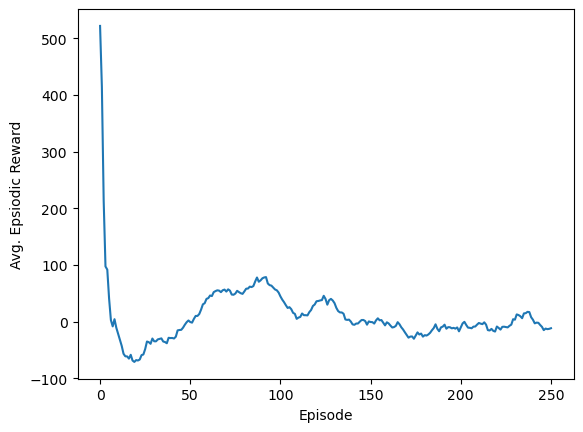

State 1:  [0.23822633 0.99029281 0.58573062 0.96003986 0.37147526 0.49915217
 0.21709052 0.52379149 0.25911799] 
State 2:  [0.25350318 0.3578299  0.30953917 1.07049343 0.99817294 0.9006921
 0.29424074 0.42751864 0.27824059] 

Agent 0 Action [[0.217 0.524 0.259]]
Agent 1 Action [[0.294 0.428 0.278]]
Time Taken till now: 0.155 Hrs

 Episode * 252 * Episode Reward is ==> 232.89 : Ag1 Reward ==> 154.49 : Ag2 Reward ==> 78.40:

 Episode * 253 * Episode Reward is ==> 193.10 : Ag1 Reward ==> 46.90 : Ag2 Reward ==> 146.20:

 Episode * 254 * Episode Reward is ==> -143.07 : Ag1 Reward ==> -106.81 : Ag2 Reward ==> -36.25:

 Episode * 255 * Episode Reward is ==> -231.43 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -106.43:

 Episode * 256 * Episode Reward is ==> -126.22 : Ag1 Reward ==> -69.50 : Ag2 Reward ==> -56.73:

 Episode * 257 * Episode Reward is ==> -176.73 : Ag1 Reward ==> -108.19 : Ag2 Reward ==> -68.54:

 Episode * 258 * Episode Reward is ==> -90.56 : Ag1 Reward ==> -48.30 : Ag2 Reward ==>

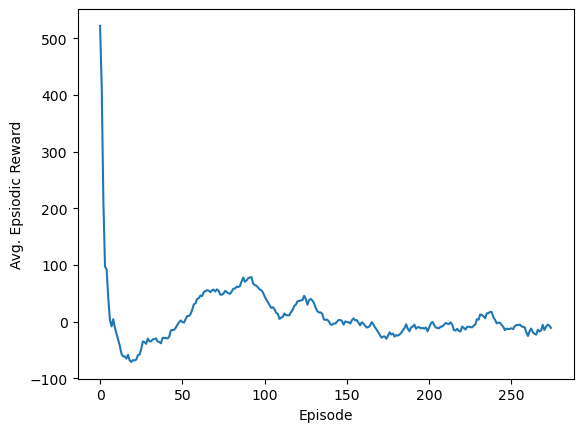

State 1:  [0.63006253 0.80084817 0.34740629 0.4548599  0.44626008 0.89428629
 0.25072962 0.42178202 0.32748839] 
State 2:  [1.76257576 0.69966241 1.74405491 0.09535261 0.49832076 0.0932238
 0.32530582 0.37974122 0.29495302] 

Agent 0 Action [[0.251 0.422 0.327]]
Agent 1 Action [[0.325 0.38  0.295]]
Time Taken till now: 0.171 Hrs

 Episode * 276 * Episode Reward is ==> 509.53 : Ag1 Reward ==> 151.39 : Ag2 Reward ==> 358.14:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


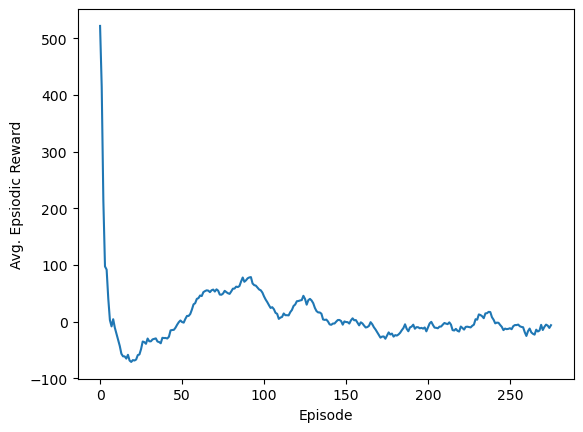

State 1:  [0.44522402 1.49598372 0.39246903 0.63102996 0.15939197 0.81365121
 0.24619345 0.42377177 0.33003473] 
State 2:  [0.58844578 1.10087552 1.85994849 0.55951827 0.27035945 0.0777056
 0.3286863  0.38608152 0.28523219] 

Agent 0 Action [[0.246 0.424 0.33 ]]
Agent 1 Action [[0.329 0.386 0.285]]
Time Taken till now: 0.171 Hrs

 Episode * 277 * Episode Reward is ==> 500.90 : Ag1 Reward ==> 198.71 : Ag2 Reward ==> 302.18:

 Episode * 278 * Episode Reward is ==> 278.45 : Ag1 Reward ==> 45.46 : Ag2 Reward ==> 232.99:

 Episode * 279 * Episode Reward is ==> 150.97 : Ag1 Reward ==> 93.29 : Ag2 Reward ==> 57.68:

 Episode * 280 * Episode Reward is ==> -221.00 : Ag1 Reward ==> -116.15 : Ag2 Reward ==> -104.85:

 Episode * 281 * Episode Reward is ==> -71.41 : Ag1 Reward ==> -43.95 : Ag2 Reward ==> -27.46:

 Episode * 282 * Episode Reward is ==> -250.00 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -125.00:

 Episode * 283 * Episode Reward is ==> -34.41 : Ag1 Reward ==> 16.29 : Ag2 Reward ==> -50

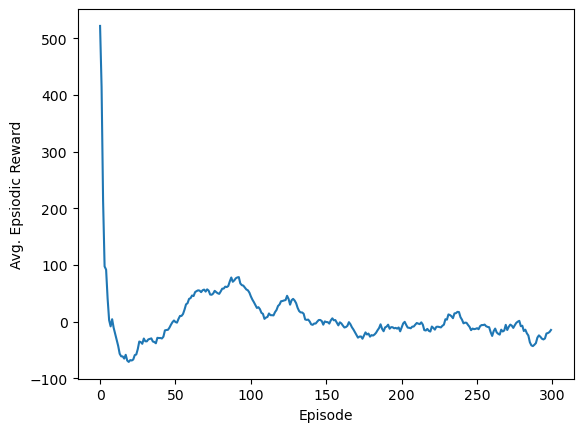

State 1:  [0.59134162 1.93881412 0.99909562 0.51122783 0.07316888 0.32283638
 0.27718502 0.31657612 0.40623885] 
State 2:  [0.26503808 1.5499285  1.5660558  1.04007522 0.14232449 0.12323041
 0.29576385 0.39448544 0.30975077] 

Agent 0 Action [[0.277 0.317 0.406]]
Agent 1 Action [[0.296 0.394 0.31 ]]
Time Taken till now: 0.187 Hrs

 Episode * 301 * Episode Reward is ==> 588.30 : Ag1 Reward ==> 300.44 : Ag2 Reward ==> 287.86:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


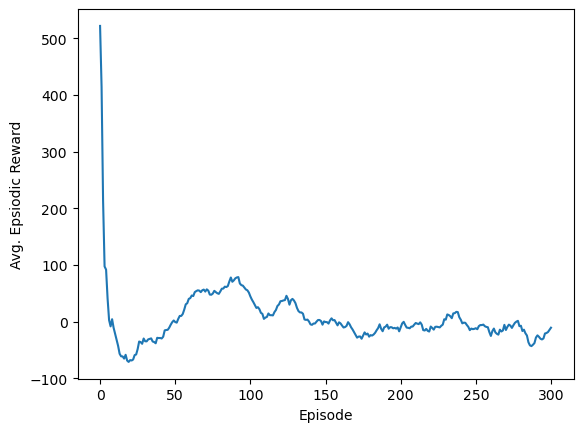

State 1:  [0.28209966 0.30983894 0.40482638 0.99755416 0.89623348 0.90134953
 0.29759082 0.27589348 0.42651573] 
State 2:  [0.29520875 1.81947668 1.34512728 0.96014507 0.09725753 0.16873684
 0.2946437  0.39801019 0.30734608] 

Agent 0 Action [[0.298 0.276 0.427]]
Agent 1 Action [[0.295 0.398 0.307]]
Time Taken till now: 0.187 Hrs

 Episode * 302 * Episode Reward is ==> 379.42 : Ag1 Reward ==> 84.85 : Ag2 Reward ==> 294.57:

 Episode * 303 * Episode Reward is ==> 55.08 : Ag1 Reward ==> 57.82 : Ag2 Reward ==> -2.75:

 Episode * 304 * Episode Reward is ==> -227.97 : Ag1 Reward ==> -102.97 : Ag2 Reward ==> -125.00:

 Episode * 305 * Episode Reward is ==> 14.66 : Ag1 Reward ==> -16.72 : Ag2 Reward ==> 31.38:

 Episode * 306 * Episode Reward is ==> 104.63 : Ag1 Reward ==> 46.39 : Ag2 Reward ==> 58.25:

 Episode * 307 * Episode Reward is ==> -88.76 : Ag1 Reward ==> -36.91 : Ag2 Reward ==> -51.85:

 Episode * 308 * Episode Reward is ==> 130.89 : Ag1 Reward ==> 18.96 : Ag2 Reward ==> 111.93:

 

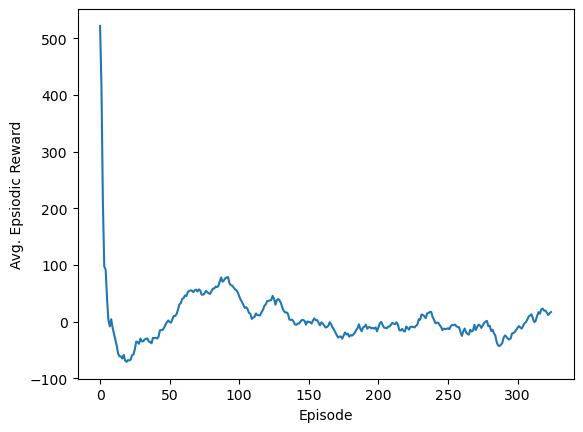

State 1:  [1.20409327 0.47510947 0.24885356 0.18562704 0.82288652 1.06363048
 0.24667774 0.47026095 0.2830613 ] 
State 2:  [0.53986209 1.84911456 0.65689207 0.61215337 0.08880619 0.4816478
 0.33107507 0.36111772 0.30780721] 

Agent 0 Action [[0.247 0.47  0.283]]
Agent 1 Action [[0.331 0.361 0.308]]
Time Taken till now: 0.203 Hrs

 Episode * 326 * Episode Reward is ==> 423.45 : Ag1 Reward ==> 164.13 : Ag2 Reward ==> 259.32:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


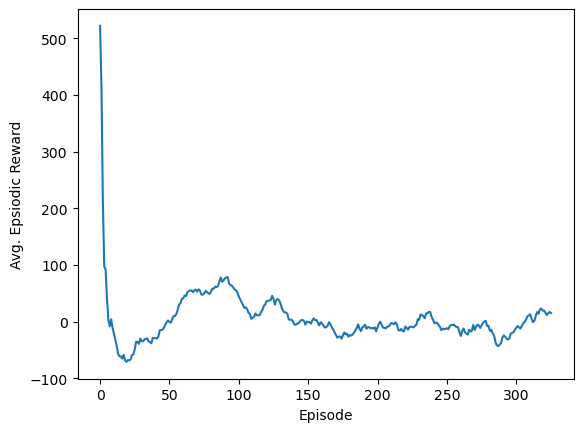

State 1:  [0.68030673 0.5076702  1.14831003 0.4244882  0.75399956 0.22036974
 0.25849953 0.44639584 0.29510459] 
State 2:  [0.54235021 1.02911758 0.9894304  0.60357298 0.29111179 0.28787887
 0.32476521 0.36148021 0.31375453] 

Agent 0 Action [[0.258 0.446 0.295]]
Agent 1 Action [[0.325 0.361 0.314]]
Time Taken till now: 0.203 Hrs

 Episode * 327 * Episode Reward is ==> 416.93 : Ag1 Reward ==> 198.90 : Ag2 Reward ==> 218.03:

 Episode * 328 * Episode Reward is ==> -250.00 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -125.00:

 Episode * 329 * Episode Reward is ==> 198.44 : Ag1 Reward ==> 83.49 : Ag2 Reward ==> 114.95:

 Episode * 330 * Episode Reward is ==> 132.83 : Ag1 Reward ==> 93.35 : Ag2 Reward ==> 39.47:

 Episode * 331 * Episode Reward is ==> 113.70 : Ag1 Reward ==> 26.90 : Ag2 Reward ==> 86.80:

 Episode * 332 * Episode Reward is ==> 326.22 : Ag1 Reward ==> 192.17 : Ag2 Reward ==> 134.06:

 Episode * 333 * Episode Reward is ==> 199.76 : Ag1 Reward ==> 143.42 : Ag2 Reward ==> 56.34:

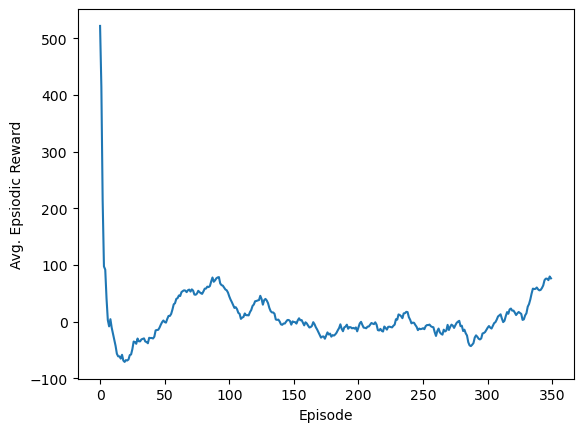

State 1:  [0.31668657 0.40996544 0.35973617 0.86069882 0.98691982 0.70436029
 0.26297963 0.52233207 0.21468832] 
State 2:  [1.39427104 0.7118531  0.54903446 0.21009809 0.30610502 0.57470616
 0.54925758 0.14912784 0.30161455] 

Agent 0 Action [[0.263 0.522 0.215]]
Agent 1 Action [[0.549 0.149 0.302]]
Time Taken till now: 0.218 Hrs

 Episode * 351 * Episode Reward is ==> 318.24 : Ag1 Reward ==> 92.47 : Ag2 Reward ==> 225.77:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


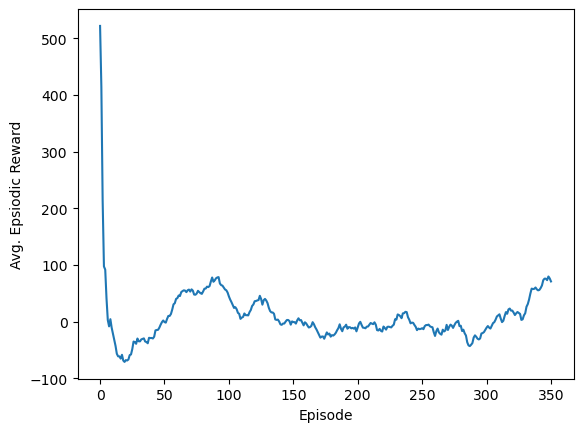

State 1:  [0.60904597 0.56243734 0.24712514 0.47556394 0.74065808 0.94104674
 0.25503919 0.52552491 0.21943596] 
State 2:  [0.52243438 0.16070923 1.78889188 0.83546894 0.94646123 0.08745329
 0.57876706 0.12623292 0.29500005] 

Agent 0 Action [[0.255 0.526 0.219]]
Agent 1 Action [[0.579 0.126 0.295]]
Time Taken till now: 0.218 Hrs

 Episode * 352 * Episode Reward is ==> 331.22 : Ag1 Reward ==> 120.74 : Ag2 Reward ==> 210.48:

 Episode * 353 * Episode Reward is ==> -153.82 : Ag1 Reward ==> -28.82 : Ag2 Reward ==> -125.00:

 Episode * 354 * Episode Reward is ==> -143.18 : Ag1 Reward ==> -92.01 : Ag2 Reward ==> -51.17:

 Episode * 355 * Episode Reward is ==> 139.33 : Ag1 Reward ==> 47.83 : Ag2 Reward ==> 91.50:

 Episode * 356 * Episode Reward is ==> 62.18 : Ag1 Reward ==> 66.95 : Ag2 Reward ==> -4.77:

 Episode * 357 * Episode Reward is ==> -200.20 : Ag1 Reward ==> -75.20 : Ag2 Reward ==> -125.00:

 Episode * 358 * Episode Reward is ==> -15.35 : Ag1 Reward ==> -17.19 : Ag2 Reward ==> 1.84

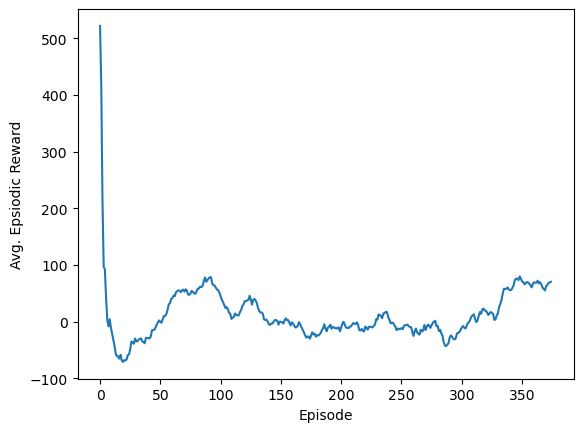

State 1:  [0.42803106 1.12416299 0.35474548 0.6313625  0.3056049  0.75522524
 0.23010658 0.5284999  0.24139348] 
State 2:  [0.7021109  0.16343969 0.54074485 0.62350341 0.83905269 0.58119935
 0.59929252 0.10131406 0.29939342] 

Agent 0 Action [[0.23  0.528 0.241]]
Agent 1 Action [[0.599 0.101 0.299]]
Time Taken till now: 0.234 Hrs

 Episode * 376 * Episode Reward is ==> 272.24 : Ag1 Reward ==> 162.30 : Ag2 Reward ==> 109.94:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


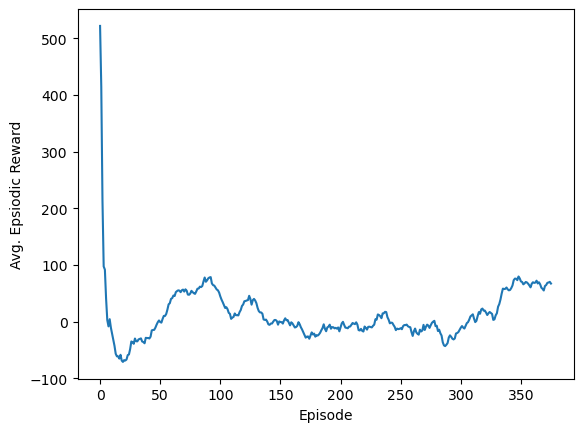

State 1:  [0.28901932 1.00687944 0.25218509 0.85353202 0.3675473  0.96072959
 0.22570151 0.53902853 0.23526993] 
State 2:  [1.44846684 0.26157016 0.29275383 0.20621258 0.56620775 0.9671751
 0.61865175 0.08603032 0.29531795] 

Agent 0 Action [[0.226 0.539 0.235]]
Agent 1 Action [[0.619 0.086 0.295]]
Time Taken till now: 0.234 Hrs

 Episode * 377 * Episode Reward is ==> 302.13 : Ag1 Reward ==> 131.79 : Ag2 Reward ==> 170.34:

 Episode * 378 * Episode Reward is ==> -34.37 : Ag1 Reward ==> 72.69 : Ag2 Reward ==> -107.06:

 Episode * 379 * Episode Reward is ==> 57.50 : Ag1 Reward ==> 98.73 : Ag2 Reward ==> -41.23:

 Episode * 380 * Episode Reward is ==> 99.37 : Ag1 Reward ==> 57.86 : Ag2 Reward ==> 41.51:

 Episode * 381 * Episode Reward is ==> -78.15 : Ag1 Reward ==> -92.94 : Ag2 Reward ==> 14.79:

 Episode * 382 * Episode Reward is ==> -91.74 : Ag1 Reward ==> -107.51 : Ag2 Reward ==> 15.77:

 Episode * 383 * Episode Reward is ==> -250.00 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -125.00:


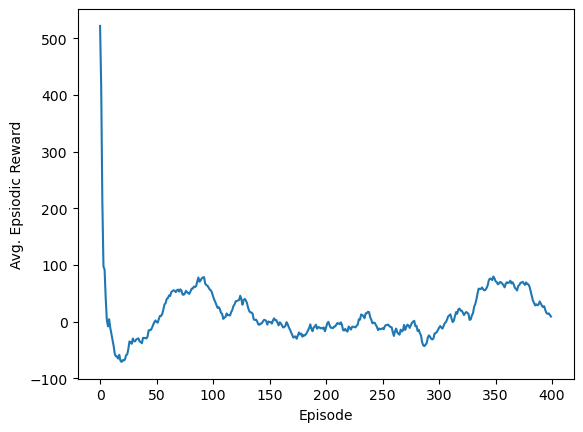

State 1:  [0.70020846 1.17818431 1.26173208 0.33449439 0.28371874 0.1864476
 0.17140645 0.53408635 0.29450721] 
State 2:  [0.84587372 0.15476335 0.38824673 0.49368889 0.87284107 0.78664007
 0.59452438 0.10245563 0.30302006] 

Agent 0 Action [[0.171 0.534 0.295]]
Agent 1 Action [[0.595 0.102 0.303]]
Time Taken till now: 0.248 Hrs

 Episode * 401 * Episode Reward is ==> 385.65 : Ag1 Reward ==> 267.37 : Ag2 Reward ==> 118.28:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


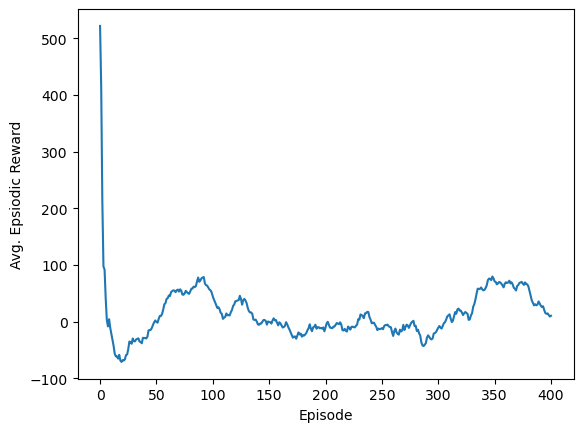

State 1:  [0.39847981 0.46675094 0.24203871 0.64486844 0.90368983 0.99463442
 0.2126179  0.5492087  0.23817337] 
State 2:  [1.69783945 0.26363602 0.2594261  0.14260535 0.59074021 1.06452345
 0.60472572 0.09469702 0.30057722] 

Agent 0 Action [[0.213 0.549 0.238]]
Agent 1 Action [[0.605 0.095 0.301]]
Time Taken till now: 0.248 Hrs

 Episode * 402 * Episode Reward is ==> 283.17 : Ag1 Reward ==> 94.23 : Ag2 Reward ==> 188.94:

 Episode * 403 * Episode Reward is ==> 83.07 : Ag1 Reward ==> 1.03 : Ag2 Reward ==> 82.05:

 Episode * 404 * Episode Reward is ==> 78.19 : Ag1 Reward ==> -60.20 : Ag2 Reward ==> 138.39:

 Episode * 405 * Episode Reward is ==> 131.27 : Ag1 Reward ==> 52.69 : Ag2 Reward ==> 78.58:

 Episode * 406 * Episode Reward is ==> 139.07 : Ag1 Reward ==> 54.32 : Ag2 Reward ==> 84.75:

 Episode * 407 * Episode Reward is ==> 99.97 : Ag1 Reward ==> -13.64 : Ag2 Reward ==> 113.62:

 Episode * 408 * Episode Reward is ==> 21.19 : Ag1 Reward ==> 57.66 : Ag2 Reward ==> -36.48:

 Episode

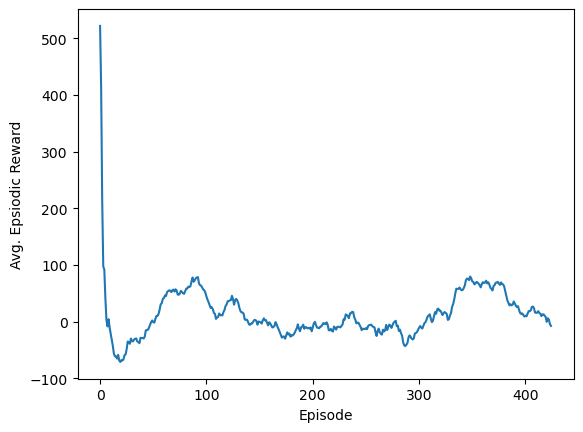

State 1:  [0.488939   0.95189332 0.70083862 0.6134392  0.37532188 0.40234339
 0.27545327 0.47603813 0.24850863] 
State 2:  [0.75566339 0.90190342 1.56864938 0.54694164 0.21192096 0.12499295
 0.54866737 0.13028219 0.32105047] 

Agent 0 Action [[0.275 0.476 0.249]]
Agent 1 Action [[0.549 0.13  0.321]]
Time Taken till now: 0.263 Hrs

 Episode * 426 * Episode Reward is ==> 456.93 : Ag1 Reward ==> 182.35 : Ag2 Reward ==> 274.58:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


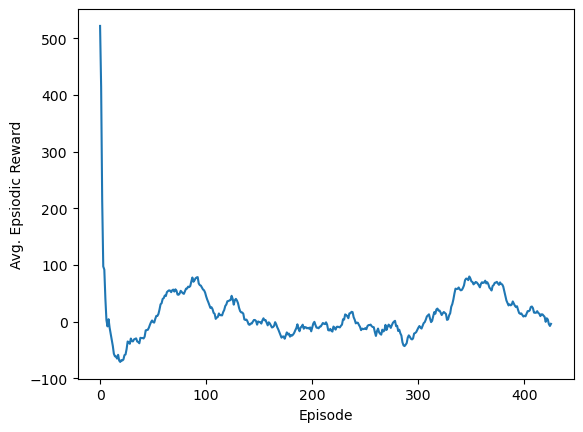

State 1:  [0.97215766 0.38810408 0.41898802 0.28681774 0.97586709 0.65443327
 0.29561412 0.46605527 0.23833057] 
State 2:  [1.78222916 0.25365864 1.06588834 0.12193399 0.69772536 0.25616525
 0.56250465 0.12510574 0.31238964] 

Agent 0 Action [[0.296 0.466 0.238]]
Agent 1 Action [[0.563 0.125 0.312]]
Time Taken till now: 0.263 Hrs

 Episode * 427 * Episode Reward is ==> 415.59 : Ag1 Reward ==> 151.50 : Ag2 Reward ==> 264.09:

 Episode * 428 * Episode Reward is ==> -42.87 : Ag1 Reward ==> -14.71 : Ag2 Reward ==> -28.16:

 Episode * 429 * Episode Reward is ==> 136.87 : Ag1 Reward ==> 41.08 : Ag2 Reward ==> 95.79:

 Episode * 430 * Episode Reward is ==> 91.06 : Ag1 Reward ==> 10.16 : Ag2 Reward ==> 80.90:

 Episode * 431 * Episode Reward is ==> -53.38 : Ag1 Reward ==> -44.46 : Ag2 Reward ==> -8.92:

 Episode * 432 * Episode Reward is ==> -139.96 : Ag1 Reward ==> -83.19 : Ag2 Reward ==> -56.76:

 Episode * 433 * Episode Reward is ==> 47.31 : Ag1 Reward ==> 39.76 : Ag2 Reward ==> 7.55:

 Epi

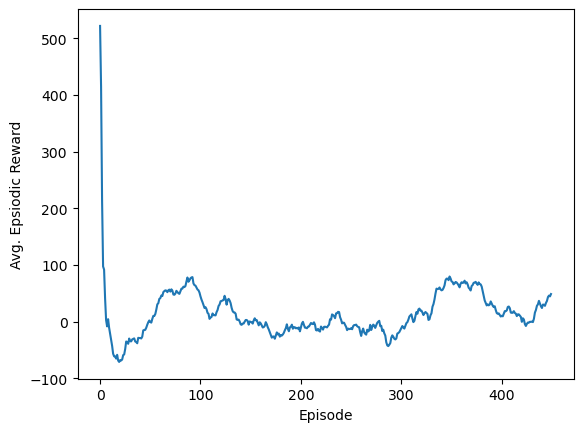

State 1:  [1.28266304 1.0759369  1.36662925 0.15878223 0.33656651 0.13754747
 0.22702061 0.55562687 0.21735251] 
State 2:  [1.1162641  0.1772004  1.02914448 0.33051158 0.7678116  0.26615085
 0.60388666 0.09393988 0.30217341] 

Agent 0 Action [[0.227 0.556 0.217]]
Agent 1 Action [[0.604 0.094 0.302]]
Time Taken till now: 0.279 Hrs

 Episode * 451 * Episode Reward is ==> 514.93 : Ag1 Reward ==> 317.22 : Ag2 Reward ==> 197.71:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


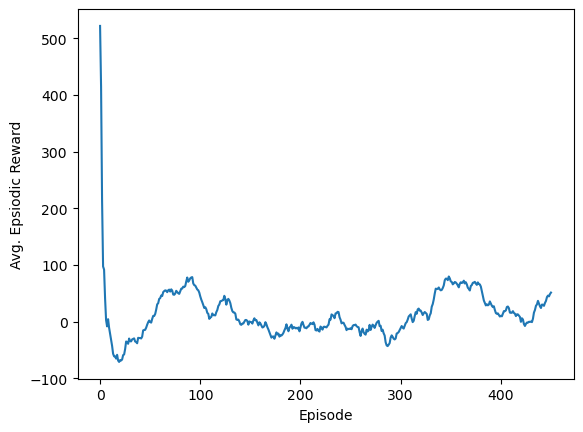

State 1:  [0.9920109  0.61135897 0.47433119 0.24283621 0.71222874 0.53526958
 0.22499752 0.57661724 0.19838524] 
State 2:  [1.39849067 0.21977942 0.31644113 0.22000762 0.66400675 0.91559755
 0.60967553 0.09307645 0.29724804] 

Agent 0 Action [[0.225 0.577 0.198]]
Agent 1 Action [[0.61  0.093 0.297]]
Time Taken till now: 0.279 Hrs

 Episode * 452 * Episode Reward is ==> 341.56 : Ag1 Reward ==> 176.90 : Ag2 Reward ==> 164.65:

 Episode * 453 * Episode Reward is ==> 37.12 : Ag1 Reward ==> -60.88 : Ag2 Reward ==> 98.00:

 Episode * 454 * Episode Reward is ==> 195.25 : Ag1 Reward ==> 44.32 : Ag2 Reward ==> 150.93:

 Episode * 455 * Episode Reward is ==> -205.25 : Ag1 Reward ==> -80.25 : Ag2 Reward ==> -125.00:

 Episode * 456 * Episode Reward is ==> 87.69 : Ag1 Reward ==> 8.76 : Ag2 Reward ==> 78.93:

 Episode * 457 * Episode Reward is ==> 54.76 : Ag1 Reward ==> -17.24 : Ag2 Reward ==> 72.00:

 Episode * 458 * Episode Reward is ==> -152.43 : Ag1 Reward ==> -54.20 : Ag2 Reward ==> -98.23:

 

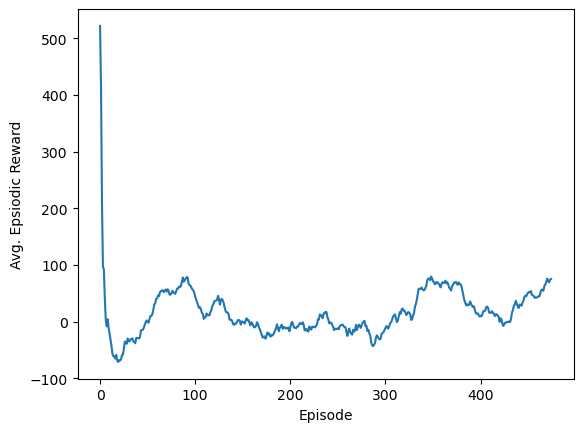

State 1:  [0.40256417 1.78969482 0.2724751  0.67144647 0.12537986 0.74530461
 0.23446965 0.6075325  0.15799786] 
State 2:  [0.81113453 0.26794429 0.76827422 0.51657961 0.68369586 0.38724495
 0.5838182  0.12980407 0.28637773] 

Agent 0 Action [[0.234 0.608 0.158]]
Agent 1 Action [[0.584 0.13  0.286]]
Time Taken till now: 0.295 Hrs

 Episode * 476 * Episode Reward is ==> 367.09 : Ag1 Reward ==> 209.80 : Ag2 Reward ==> 157.28:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


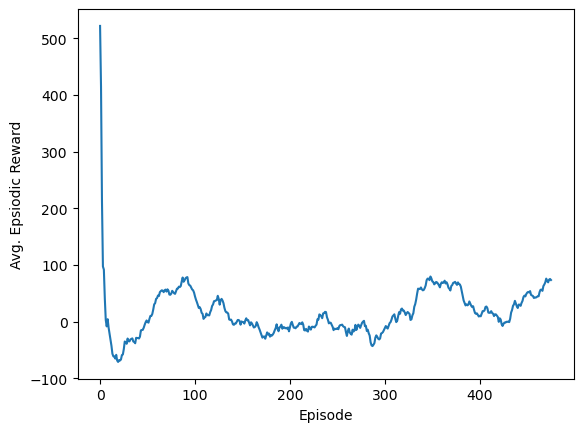

State 1:  [0.84821501 0.42125323 0.17973034 0.31285537 1.04814184 0.93711485
 0.24050221 0.61701268 0.14248514] 
State 2:  [1.61979773 0.54233973 0.37098264 0.15756155 0.37337148 0.7919211
 0.59059757 0.12427291 0.28512955] 

Agent 0 Action [[0.241 0.617 0.142]]
Agent 1 Action [[0.591 0.124 0.285]]
Time Taken till now: 0.295 Hrs

 Episode * 477 * Episode Reward is ==> 338.94 : Ag1 Reward ==> 123.39 : Ag2 Reward ==> 215.55:

 Episode * 478 * Episode Reward is ==> -221.79 : Ag1 Reward ==> -105.25 : Ag2 Reward ==> -116.54:

 Episode * 479 * Episode Reward is ==> -48.36 : Ag1 Reward ==> -61.79 : Ag2 Reward ==> 13.43:

 Episode * 480 * Episode Reward is ==> -110.75 : Ag1 Reward ==> -58.27 : Ag2 Reward ==> -52.48:

 Episode * 481 * Episode Reward is ==> -220.76 : Ag1 Reward ==> -107.91 : Ag2 Reward ==> -112.85:

 Episode * 482 * Episode Reward is ==> -250.00 : Ag1 Reward ==> -125.00 : Ag2 Reward ==> -125.00:

 Episode * 483 * Episode Reward is ==> -240.48 : Ag1 Reward ==> -115.48 : Ag2 Rewar

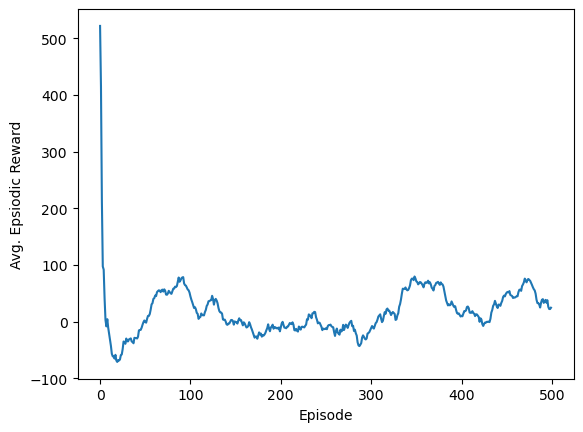

State 1:  [1.06387798 0.63321919 0.29066059 0.21944091 0.6781063  0.81768445
 0.22787322 0.56325889 0.20886792] 
State 2:  [1.82636248 0.15563282 1.26659374 0.11860377 0.83275129 0.18764726
 0.60352683 0.0939081  0.30256501] 

Agent 0 Action [[0.228 0.563 0.209]]
Agent 1 Action [[0.604 0.094 0.303]]
Time Taken till now: 0.31 Hrs

 Episode * 501 * Episode Reward is ==> 445.82 : Ag1 Reward ==> 169.25 : Ag2 Reward ==> 276.56:
-----------------------------------Evaluation in Progress-------------------------------

----------------------------------------------------------------------------
Epsilon 1


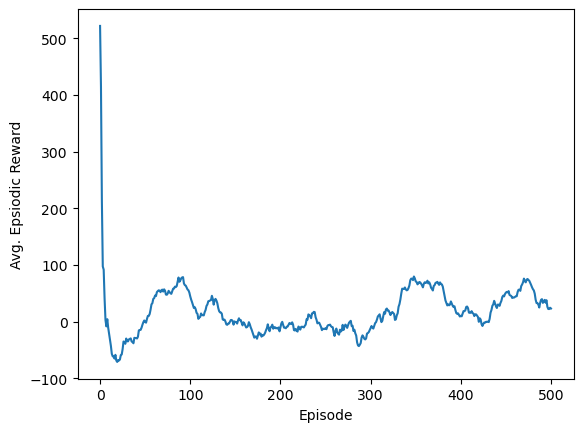

State 1:  [0.50004054 0.84452921 0.28049926 0.5515612  0.47914226 0.84177478
 0.23217519 0.55766302 0.21016179] 
State 2:  [0.77912623 0.80269194 0.33447442 0.55209423 0.22247468 0.869743
 0.60259193 0.10544051 0.29196757] 

Agent 0 Action [[0.232 0.558 0.21 ]]
Agent 1 Action [[0.603 0.105 0.292]]
Time Taken till now: 0.31 Hrs

 Episode * 502 * Episode Reward is ==> 301.61 : Ag1 Reward ==> 138.38 : Ag2 Reward ==> 163.23:

 Episode * 503 * Episode Reward is ==> 85.36 : Ag1 Reward ==> 112.86 : Ag2 Reward ==> -27.50:

 Episode * 504 * Episode Reward is ==> -59.00 : Ag1 Reward ==> -21.20 : Ag2 Reward ==> -37.79:

 Episode * 505 * Episode Reward is ==> 148.90 : Ag1 Reward ==> 9.32 : Ag2 Reward ==> 139.58:

 Episode * 506 * Episode Reward is ==> 88.61 : Ag1 Reward ==> 20.93 : Ag2 Reward ==> 67.68:

 Episode * 507 * Episode Reward is ==> 74.82 : Ag1 Reward ==> 71.28 : Ag2 Reward ==> 3.53:

 Episode * 508 * Episode Reward is ==> 323.28 : Ag1 Reward ==> 186.80 : Ag2 Reward ==> 136.48:

 Episode

In [ ]:
start_time=time.time()
epsilon=1
Agent=[]
for i in range(2):
    Agent.append(Agent_IAB( opt,sce,dim_agent_action,dim_agent_state,scenario,Agent_type='IAB', index=i, device=device))

for ep in range(num_episodes):
    # if epsilon>0.1: epsilon-=0.0002
    # if epsilon>0.1: epsilon-=0.001
    scenario = Scenario(sce)
    # plot_locations(scenario,sce,opt)
    
    episodic_reward = 0
    ag1_reward = 0
    ag2_reward = 0

    # Initializing environment
    prev_state = initial_state(scenario,Agent,prev_state,sce,dim_agent_action)    
    evaluation_print_once=True
    for i in range(num_steps):

        if (ep%25==0) or (ep %25==1): # Do pure evaluation every 25th and 26th episode for debugging: 
            training = False
        else: training =True
        
        # Expanding dimension of state from 1-d array to 2-d array
        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
        tf_prev_state=tf.convert_to_tensor(tf_prev_state)
        
        # Action Value for each agents will be stored in this list
        actions = np.zeros([num_agents,dim_agent_action])

################################### TRAINING #######################################################
        
        if training==True: # last 3 actions are power, 1st 3 are channel
            # Get actions for each agents from respective models and store them in list
            for j, model in enumerate(actor_models):
                action = train_policy(tf_prev_state[:,j], ou_noise, model,sce.K,epsilon)
                actions[j]=normalize_power(action[0])
    
    
            # Recieve new state and reward from environment. 
            # print('Actions:',actions)
            new_state,rewards = step(scenario,Agent,actions)
            cooperative_rewards=[np.mean(rewards),np.mean(rewards)]
    
            # Record the experience of all the agents
            # in the replay buffer
            buffer.record((prev_state, actions, cooperative_rewards, new_state))
            
            # Sum of rewards of all 3 agents
            episodic_reward += sum(rewards)
            
            # Rewards of agent 1 and 2
            ag1_reward += rewards[0]
            ag2_reward += rewards[1]
    
            # Updating parameters of actor and critic 
            # of all 3 agents using maddpg algorithm
            buffer.learn(actor_models, critic_models, target_actor_models, target_critic_models)
            
            # Updating target networks for each agent
            update_target(tau, actor_models, critic_models, target_actor_models, target_critic_models)
            # Updating old state with new state
            prev_state = new_state

############################################################## EVALUATION ###############################################
        
        elif training==False:

            if evaluation_print_once: # Print ony once per episode
                print('-----------------------------------Evaluation in Progress-------------------------------')
                evaluation_print_once=False
            for j, model in enumerate(actor_models):
                action = policy(tf_prev_state[:,j], ou_noise, model,'predict')
                actions[j]=action[0]
            new_state,rewards = step(scenario,Agent,actions)
            cooperative_rewards=[np.mean(rewards),np.mean(rewards)]
            buffer.record((prev_state, actions, cooperative_rewards, new_state))
            episodic_reward += sum(rewards)
            ag1_reward += rewards[0]
            ag2_reward += rewards[1]
            # Updating old state with new state
            prev_state = new_state

##################################################### MODEL SAVE & RESULTS ####################################################
    # Saving models after every 10 episodes
    if ep%500 == 0:
        
        for k in range(num_agents):
            actor_models[k].save(save_path + 'actor'+str(k)+'.h5') 
            critic_models[k].save(save_path + 'critic'+str(k)+'.h5')

            target_actor_models[k].save(save_path + 'target_actor' + str(k)+'.h5')
            target_critic_models[k].save(save_path + 'target_critic' + str(k)+'.h5')

    if (ep%25 == 0) or  (ep%25 == 1):
        print('\n----------------------------------------------------------------------------')
        print('Epsilon',epsilon)
    # Plotting Reward vs Episode plot
        plt.plot(avg_reward_list)
        plt.xlabel("Episode")
        plt.ylabel("Avg. Epsiodic Reward")
        plt.show()
        np.savetxt('results/graph_avg_reward_results.csv', avg_reward_list, delimiter=',')
        np.savetxt('results/Agent1_reward_results.csv', ag1_reward_list, delimiter=',')
        np.savetxt('results/Agent2_reward_results.csv', ag2_reward_list, delimiter=',')
        plt.savefig('training_results.png')
        print('State 1: ',prev_state[0],'\nState 2: ',prev_state[1],'\n')
        for m, model in enumerate(actor_models):
            action = policy(tf_prev_state[:,m], ou_noise, model,'predict')
            print('Agent',m,'Action',np.round(action,3))
            
        print('Time Taken till now:',np.round((time.time()-start_time)/3600,3),'Hrs')
    
    ep_reward_list.append(episodic_reward)
    ag1_reward_list.append(ag1_reward)
    ag2_reward_list.append(ag2_reward)

    # Mean of last 40 episodes
    avg_reward = np.mean(ep_reward_list[-50:])
    print("\n Episode * {} * Episode Reward is ==> {:.2f} : Ag1 Reward ==> {:.2f} : Ag2 Reward ==> {:.2f}:".format(ep+1, episodic_reward, ag1_reward, ag2_reward))
    avg_reward_list.append(avg_reward)

# Plotting Reward vs Episode plot
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Avg. Epsiodic Reward")
plt.savefig('results/training_results.png')
plt.show()


In [ ]:
# train_policy(tf_prev_state[:,j], ou_noise, model,sce.K,epsilon)

In [ ]:
def policy(state, noise_object, model,train='train'):
    
    sampled_actions = tf.squeeze(model(state))
    print(sampled_actions)
    
    # Adding noise to action
    if train=='train':
        noise = noise_object()
        sampled_actions = sampled_actions.numpy() + noise
        
    elif train=='predict':
        sampled_actions = sampled_actions.numpy()     

    # We make sure action is within bounds
    legal_action = np.clip(sampled_actions, 0, 1)

    return [np.squeeze(legal_action)]

# Execution

In [ ]:
# os. getcwd() 

In [ ]:
actor_models = []
for i in [0,1]:
    actor_models.append(tf.keras.models.load_model('saved_models/actor'+str(i)+'.h5'))

In [ ]:
actor_models[0].summary()

In [ ]:
# Dimension of State & Action Space for single agent

dim_agent_action= sce.nChannel*sce.nIAB

dim_agent_state = 2*sce.K + dim_agent_action

# Number of Agents
num_agents = sce.nIAB

# Critic all states
critic_dim_agent_state=num_agents*dim_agent_state

# Number of Episodes
num_episodes = 10001

# Number of Steps in each episodes
num_steps = 25

# For adding noise for exploration
std_dev = 0.2
ou_noise = OUActionNoise(mean=np.zeros(dim_agent_action), std_deviation=float(std_dev) * np.ones(dim_agent_action))

action_IAB=np.zeros((sce.nIAB, dim_agent_action))
prev_state=np.zeros((sce.nIAB, dim_agent_state))

Agent=[]
for i in range(2):
    Agent.append(Agent_IAB( opt,sce,dim_agent_action,dim_agent_state,scenario,Agent_type='IAB', index=i, device=device))

In [ ]:

ep_reward_list = []

# To store average reward history of last few episodes
avg_reward_list = []

# Rewards of agent will be stired in these lists
ag1_reward_list = []
ag2_reward_list = []

# 
for ep in range(10):
    scenario = Scenario(sce)
    plot_locations(scenario,sce,opt)
    
    episodic_reward = 0
    ag1_reward = 0
    ag2_reward = 0

    # Initializing environment
    prev_state = initial_state(scenario,Agent,prev_state,sce,dim_agent_action)    
    
    for i in range(num_steps):
        
        # Expanding dimension of state from 1-d array to 2-d array
        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
        tf_prev_state=tf.convert_to_tensor(tf_prev_state)
        
        # Action Value for each agents will be stored in this list
        actions = np.zeros([num_agents,dim_agent_action])
        
        # Get actions for each agents from respective models and store them in list
        for j, model in enumerate(actor_models):
            action = policy(tf_prev_state[:,j], ou_noise, model,'predict')
            print('Agent',j,'Action',np.round(action,3))
            actions[j]=action[0]

        # for j, model in enumerate(actor_models):
            # print(i,'   Agent',j,'Action',np.round(action,3))
        # Recieve new state and reward from environment. 
        new_state,rewards = step(scenario,Agent,actions)
        print('Rewards:',rewards)

        # Sum of rewards of all 3 agents
        episodic_reward += sum(rewards)
        
        # Rewards of agent 1 and 2
        ag1_reward += rewards[0]
        ag2_reward += rewards[1]

        # Updating old state with new state
        prev_state = new_state
        
    ep_reward_list.append(episodic_reward)
    ag1_reward_list.append(ag1_reward)
    ag2_reward_list.append(ag2_reward)
    print("Episode * {} * Episode Reward is ==> {:.2f} : Ag1 Reward ==> {:.2f} : Ag2 Reward ==> {:.2f}:".format(ep+1, episodic_reward, ag1_reward, ag2_reward))
    for j, model in enumerate(actor_models):
        action = policy(tf_prev_state[:,j], ou_noise, model,'predict')
        print('    Agent',j,'Action',np.round(action,3))
        print('    Agent',j,'State', new_state[j])
        
    # Mean of last 40 episodes
    avg_reward = np.mean(ep_reward_list[-50:])
    avg_reward_list.append(np.around(avg_reward,3))
    
    if ep%50==0:
        # Plotting Reward vs Episode plot
        plt.plot(avg_reward_list)
        plt.xlabel("Episode")
        plt.ylabel("Avg. Epsiodic Reward")
        plt.savefig('execution_results.png')
        plt.show()
    np.savetxt('results/execution_graph_avg_rewards.csv', avg_reward_list, delimiter=',')
    np.savetxt('results/execution_agent1_rewards.csv', ag1_reward_list, delimiter=',')
    np.savetxt('results/execution_agent2_rewards.csv', ag2_reward_list, delimiter=',')

# Plotting Reward vs Episode plot
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Avg. Epsiodic Reward")
plt.savefig('execution_results.png')
plt.show()
